<a href="https://colab.research.google.com/github/ds4geo/ds4geo/blob/master/DS4GEO_L2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Topics:
1. Indexing lists
2. Dicts and indexing dicts
3. argmax vs boolean array indexing examples
4. 

In [3]:
file_name_list = ["STD-1.csv","Sample-1.csv"]
data_list = []
for fn in file_name_list:
  data_list.append(pd.read_csv(r"https://raw.githubusercontent.com/oscarbranson/latools/master/tests/test_dir/test_data/"+fn, header=3))
data_list[1]["Time [Sec]"] = data_list[1]["Time [Sec]"] + data_list[0]["Time [Sec]"].max()
data = pd.concat(data_list)

In [4]:
data

,Time [Sec],Mg24,Mg25,Al27,Ca43,Ca44,Mn55,Sr88,Ba137,Ba138
0,0.367,200.00,300.00,2200.14,366.67,17809.04,8652.16,0.00,0.0,12.5
1,0.725,466.67,200.00,2800.22,200.00,14506.00,7551.64,0.00,0.0,12.5
2,1.082,366.67,175.00,2000.11,466.67,13255.01,7151.47,100.00,25.0,0.0
3,1.439,466.67,75.00,1600.07,300.00,14405.92,8652.16,33.33,0.0,0.0
4,1.796,466.67,225.00,3000.25,200.00,14506.00,7551.64,100.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
694,497.717,166.67,150.00,2400.16,433.34,14105.67,6801.33,66.67,0.0,0.0
695,498.074,466.67,275.00,3200.29,300.00,14606.08,8702.18,33.33,0.0,25.0
696,498.431,200.00,350.00,3100.27,400.00,14455.96,9102.38,133.33,0.0,0.0
697,498.788,333.34,500.01,2500.18,100.00,13505.20,8452.06,33.33,50.0,25.0


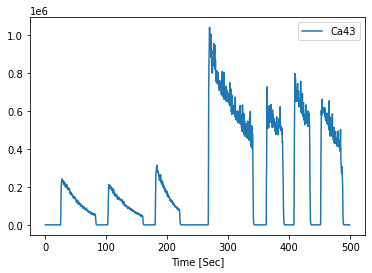

In [5]:
data.plot("Time [Sec]", "Ca43")

1. Identify Signal (Sample and Standard), and Background parts of signal
Do manually - can be done with GUI or algorithms, but do it manually now to teach basics.

A) Create list of start and end values for each background section

(0.0, 300000.0)

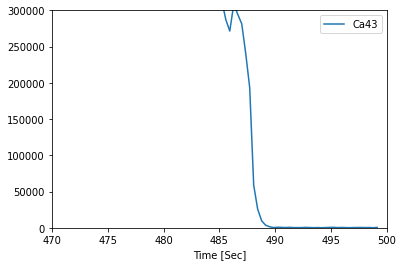

In [10]:
data.plot("Time [Sec]", "Ca43")
plt.xlim(470,500)
plt.ylim(0,0.3e6)

In [11]:
background_locations = [{"start": 0, "end": 25},
                        {"start": 225, "end": 225},
                        {"start": 491, "end": 498}]


In [18]:
data["Ca43"][np.argmax(data["Time [Sec]"] >=0): np.argmax(data["Time [Sec]"] >=25)].mean())
data["Ca43"][np.argmax(data["Time [Sec]"] >=491): np.argmax(data["Time [Sec]"] >=498)].mean()

379.2310144927534


371.93421052631584

(0.0, 1000.0)

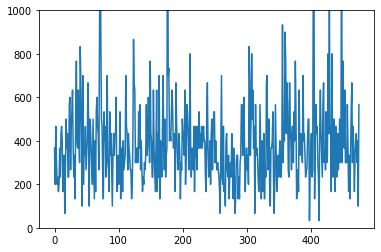

In [23]:
plt.plot(np.array(data["Ca43"])[data["Ca43"]<2000])
plt.ylim(0,1000)

264    200.00
265    300.00
266    533.34
267    133.33
268    300.00
        ...  
640    333.34
641    133.33
642    300.00
643    266.67
644    500.01
Name: Ca43, Length: 100, dtype: float64